#### Name: Sourasish Basu, Section: CSE-6, Roll: 22051636

## Building a KNN Model using Python for the Iris Dataset


![image](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*83HmcMRVDK1wPOb4)

### Algorithm

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y.

### Usage

#### Libraries:
- matplotlib
- pandas
- numpy
- scikit-learn


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Importing the Iris Dataset

In [20]:
dataset_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(dataset_url, header=None, names=columns)
plt.style.use('dark_background')

print()
data.head()
print("-" * 75)
data.describe()
print("-" * 75)


---------------------------------------------------------------------------
---------------------------------------------------------------------------


### Standardizing Dataset

In [21]:
# Convert class labels to numerical values
data['class'] = data['class'].astype('category').cat.codes

# Split into features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Generating Classification Accuracy Reports for varying K values

------------------------------------------------------------
K=3:
Accuracy: 0.90


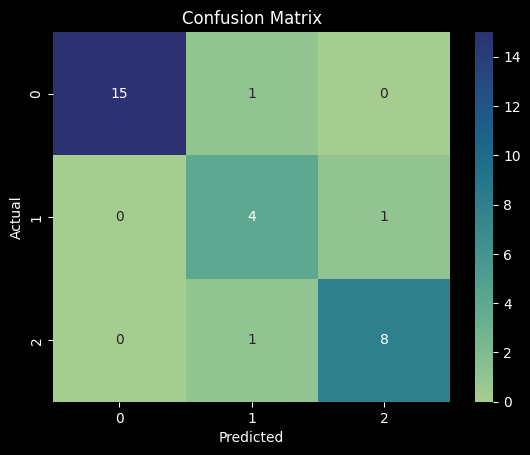

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.67      0.80      0.73         5
           2       0.89      0.89      0.89         9

    accuracy                           0.90        30
   macro avg       0.85      0.88      0.86        30
weighted avg       0.91      0.90      0.90        30

------------------------------------------------------------
K=4:
Accuracy: 0.93


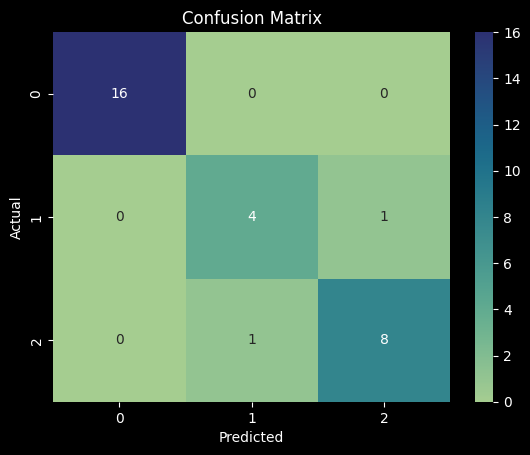

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.80      0.80      0.80         5
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30

------------------------------------------------------------
K=5:
Accuracy: 0.90


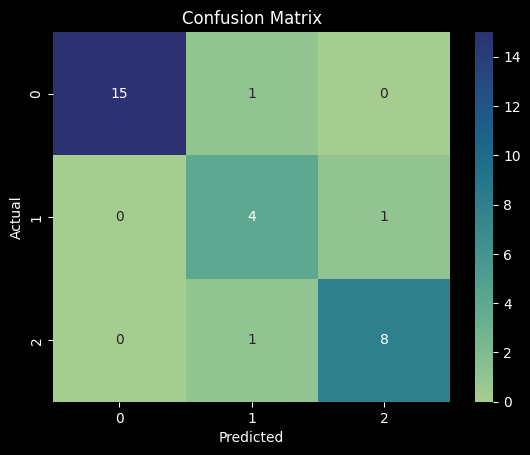

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.67      0.80      0.73         5
           2       0.89      0.89      0.89         9

    accuracy                           0.90        30
   macro avg       0.85      0.88      0.86        30
weighted avg       0.91      0.90      0.90        30

--------------------------------------------------------------------------------


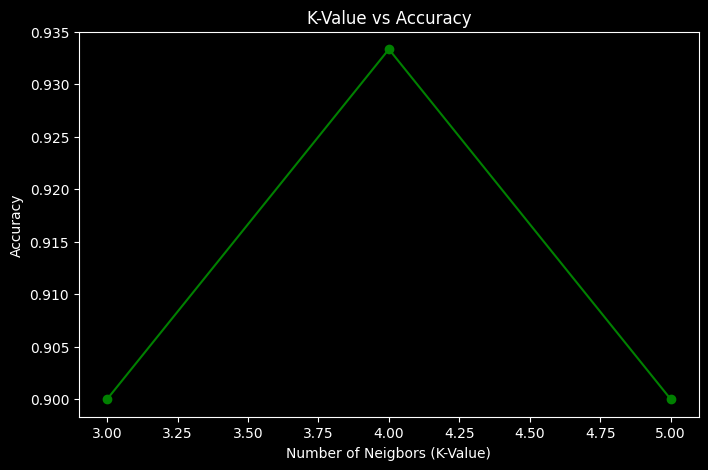

In [22]:
# Evaluate given K values
k_values = [3,4,5]
accuracies = []

for k in k_values:
    print("-" * 60)

    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"K={k}:")
    print(f"Accuracy: {accuracy:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print(classification_report(y_test, y_pred))

print("-" * 80)
# Visualize accuracy for different K values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='green')
plt.title('K-Value vs Accuracy')
plt.xlabel('Number of Neigbors (K-Value)')
plt.ylabel('Accuracy')
plt.grid(False)
plt.show()


### Building a KNN Model with best K value

In [23]:
# Choose best K value
print(f"Best K-value: {k_values[accuracies.index(max(accuracies))]}, Accuracy: {max(accuracies):.2f}")
print("")
k = 4
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Test a random value
random_value = [6, 3, 4, 2]
random_value_scaled = scaler.transform([random_value])
predicted_class = knn.predict(random_value_scaled)

# Mapping class indices to flower names
flower_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
predicted_flower = flower_names[predicted_class[0]]

# Print Random Test Data and Prediction Result
print(f"Test Value: {random_value}")
print(f"Predicted Class: {flower_names[predicted_class[0]]}")

Best K-value: 4, Accuracy: 0.93

Test Value: [6, 3, 4, 2]
Predicted Class: Virginica


### Visualizing Clusters and test data

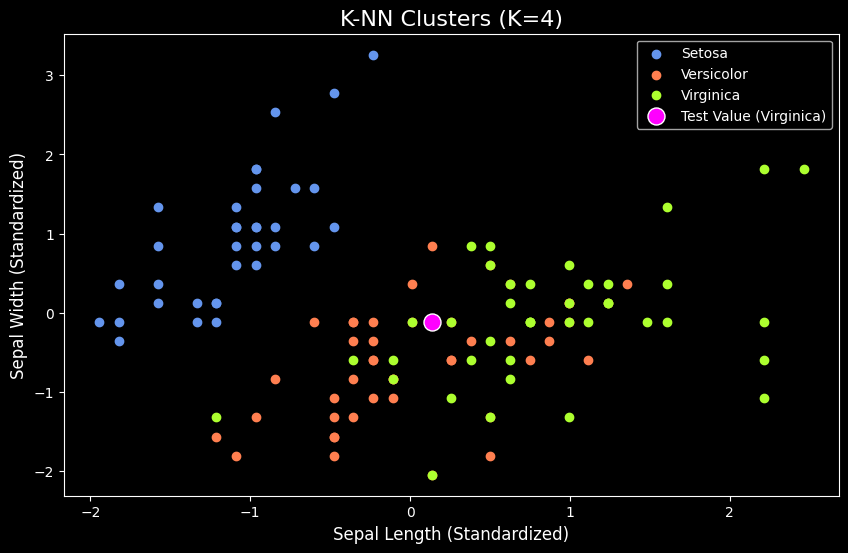

In [24]:
# Plot clusters and the test value
plt.figure(figsize=(10, 6))

# Using first two features (sepal length and sepal width) for visualization
X_train_2d = X_train[:, :2]
random_value_2d = random_value_scaled[:, :2]

b_colors = ['cornflowerblue', 'coral', 'greenyellow']

# Plot training data points by flower class
for idx, (class_value, flower_name) in enumerate(flower_names.items()):
    cluster_points = X_train_2d[y_train == class_value]
    plt.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        color=b_colors[idx % len(b_colors)], 
        label=f"{flower_name}")

# Plot the test value
plt.scatter(
    random_value_2d[:, 0],
    random_value_2d[:, 1],
    color='magenta',
    edgecolor='white',
    s=150,
    label=f"Test Value ({predicted_flower})"
)

# Add labels and legend
plt.title(f"K-NN Clusters (K={k})", fontsize=16)
plt.xlabel("Sepal Length (Standardized)", fontsize=12)
plt.ylabel("Sepal Width (Standardized)", fontsize=12)
plt.grid(False) 
plt.legend(fontsize=10, loc="best", facecolor='black')
plt.show()